In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re
import yaml
import torch
import json

sys.path.append("/private/home/yuandong/luckmatters/catalyst")
from visualization.utils import load_data, load_stats

In [3]:
import torch
a = torch.load("/checkpoint/yuandong/outputs/2019-11-07/12-38-42/0/stats.pickle")

In [10]:
# folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_20-46-30"
# folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_21-14-18"

# with bn, not great. maybe because the beta is wrong in BN case. 
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_21-21-31"

# without bn, leaky_relu not used yet
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_21-31-55"

# with leaky_relu = 0.02
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_21-38-21"

# with leaky_relu = 0.1
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_21-47-42"

# std = 3.0 (rather than 10.0)
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_22-09-58"

# std = 20.0 
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_22-16-54"

# std = 20.0 learning rate = 0.05 (not stable)
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_22-26-06"

# std = 20.0. learning rate 0: 0.02, 20: 0.01, 30: 0.005
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_22-43-49"

# std = 25.0. learning rate 0: 0.02, 20: 0.01, 30: 0.005
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-03_22-54-07"

# std = 20.0, multi=5, learning rate 0: 0.02, 20: 0.01, 30: 0.005
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_08-34-00"
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_08-40-47"

# std = 20.0, saving teacher stats.
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_09-29-11"

# std = 20.0. Tuned teacher
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_14-18-20"
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_14-28-55"
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_15-13-35"

# with weight decay (1e-4)
#folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_15-26-49"
# 1e-3
#folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_15-33-36"
# 1e-2
#folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_15-41-30"

# regen dataset.
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_15-57-36"

# regen dataset. student_stats
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_16-05-40"
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_17-12-57"

# deeper network
# learning rate learning rate 0: 0.02, 20: 0.01, 30: 0.005
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_17-35-18"
# high learning rate * 10
# folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_17-44-01"

# deeper network, multi=5
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_17-55-48"

# deeper network [50, 50, 75, 75, 100, 100], multi=5, batchnorm = true, showing some shape. 
#folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-05_10-46-55"

# deeper network [10, 10, 20, 20, 30, 30], multi=5, batchnorm = true, interesting the shape is not that great. 
#folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-05_11-06-56"
# deeper network [10, 10, 20, 20, 30, 30], multi=10, batchnorm = true.
#folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-05_11-16-53"

# deeper network [10, 10, 20, 20, 30, 30], multi=5, no batchnorm. the shape is not great (the lowest two layers are ok)
# Why top layer dones't converge that well? A lot of noise in the lower layer input (although some are right, 
# a lot of then are wrong and their beta are not zero?)
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-05_11-33-19"

# deeper network [50, 50, 75, 75, 100, 100], multi=5, batchnorm = false. the shape is not great (the lowest two layers are ok)
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-05_11-40-33"

# with bn, Tuned teacher
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_18-32-30"

# with bn, tuned teacher, deep
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_18-40-56"

# with bn, tuned teacher, deep, multi=5, data_d=100
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-04_18-48-49"

# with bn, tuned teacher, 50, 75, 100, 125
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-05_08-39-29"
# without bn, tuned teacher, 50, 75, 100, 125, low learning rate 0:0.02,20:0.01,30:0.05
# folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-05_09-08-25"
# without bn, tuned teacher, 50, 75, 100, 125, high learning rate 0:0.2,20:0.1,30:0.05
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-05_09-55-19"

# with bn, tuned teacher, multi=10, [50, 75, 100, 125], high learning rate 0:0.2,20:0.1,30:0.05
# folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-05_10-24-43"

# no over-parameterization, no bn. 
# folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-07_10-37-06"


# Bug fixed. redo the experiments. 
# [10, 10, 20, 20, 30, 30] doesn't work that well. 
# without bn 
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-10_10-45-02"
# with bn
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-10_10-51-26"

# with bn multi=10, [50, 75, 100, 125], high learning rate 0:0.2,20:0.1,30:0.05
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-10_11-06-25"
# without bn multi=10, [50, 75, 100, 125], high learning rate 0:0.2,20:0.1,30:0.05
# folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-10_11-33-00"

# smaller initial value of the student.
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_08-19-59"

# smaller initial value of the student, no bn
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_08-55-26"

# smaller initial value of the student, no bn, learning rate 0:0.2,20:0.1,30:0.05
folder = "/private/home/yuandong/dl_theory2/outputs/2019-08-21_09-27-31"

# sweeper jobs 
# /checkpoint/yuandong/outputs/2019-08-10_09-23-22
# /checkpoint/yuandong/outputs/2019-08-10_09-23-51

# new jobs
folder = "/checkpoint/yuandong/outputs/2019-11-11/16-02-23/0"

folder = "/checkpoint/yuandong/outputs/2019-11-12/12-59-22/38"

# regen jobs
folder = "/checkpoint/yuandong/outputs/2019-11-14/20-00-27/17"

folder = "/checkpoint/yuandong/outputs/2019-11-14/20-00-27/38"
folder = "/checkpoint/yuandong/outputs/2019-11-14/20-34-20/39"

# uniform distribution with std = 30
folder = "/checkpoint/yuandong/outputs/2019-11-14/20-43-27/1"

# reproduction of the previous results
# python ./recon_multilayer.py node_multi=10 seed=2351 dataset=gaussian regen_dataset_each_epoch=true stats_teacher=true stats_student=true teacher_strength_decay=0 num_trial=1 stats_H=true data_d=100
folder = "/private/home/yuandong/dl_theory2/outputs/2019-11-18/11-07-26"

# reproduction of the previous results with the current codebase. 
# python recon_multilayer.py seed=2351 stats_H=true num_trial=1 random_dataset_size=100000 node_multi=10 num_epoch=40 regen_dataset_each_epoch=true
# Default d = 20
folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-18/13-08-48"

# No BN
# python recon_multilayer.py seed=1 stats_H=true num_trial=1 random_dataset_size=100000 node_multi=10 num_epoch=40
folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-26/10-59-04"

# True reproduction
# python recon_multilayer.py seed=2351 stats_H=true num_trial=1 random_dataset_size=100000 node_multi=10 num_epoch=40 regen_dataset_each_epoch=true data_d=100
# folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-19/11-55-57"

# Smaller teacher network (N=100k)
#folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-19/14-32-32"

# Smaller teacher network (N=100k)
#folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-19/14-39-04"

# With BN.
# python recon_multilayer.py seed=1 stats_H=true num_trial=1 random_dataset_size=200000 node_multi=5 num_epoch=100 bn=true bn_affine=true
# default d = 20
#folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-25/14-15-54"

# python recon_multilayer.py seed=1 stats_H=true num_trial=1 random_dataset_size=100000 node_multi=10 num_epoch=100 bn=true bn_affine=true
# default d = 20
# folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-25/16-08-53"


# With BN and cross entropy. 
# python recon_multilayer.py seed=2351 stats_H=true num_trial=1 num_epoch=300 random_dataset_size=500000 cross_entropy=true data_d=100 bn=true bn_affine=true
# Performance is not good. 
folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-27/23-01-36"
suffix = "cross-entropy-bn-300"

# With adam.
folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-28/12-17-21"

# adam 
# python recon_multilayer.py seed=2351 stats_H=true num_trial=1 num_epoch=40 random_dataset_size=200000 data_d=100 bn=true bn_affine=true optim_method=adam lr=\"\{0:0.01,10:0.005,20:0.001}\"
folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-28/13-20-08"

# python recon_multilayer.py seed=2351 stats_H=true num_trial=1 num_epoch=40 random_dataset_size=200000 data_d=100 optim_method=adam lr=\"\{0:0.01}\" stats_grad_norm=true bn=true bn_affine=true data_std=1
folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-28/17-59-46"

# python recon_multilayer.py seed=2351 stats_H=true num_trial=1 num_epoch=40 random_dataset_size=200000 data_d=100 optim_method=adam lr="{0:0.01}" stats_grad_norm=true bn=true bn_affine=true data_std=0.2
# even with small data std, we still see adam has huge betas at the end of the training (is that an issue in adam?)
folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-28/19-56-43"

# python recon_multilayer.py seed=2351 stats_H=true num_trial=1 num_epoch=40 random_dataset_size=200000 data_d=100 optim_method=adam lr=\"\{0:0.01}\" stats_grad_norm=true bn=true bn_affine=true data_std=0.2 momentum=0.9
# No much difference if you add momentum.
# Note that adding weight decays (5e-4) will destroy it completely.  
folder = "/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-28/20-08-14"

d = load_stats(folder)
args = d["args"]
stats = d["stats"]
print(folder)

print(json.dumps(args, indent=4, sort_keys=True))

Load stats from /private/home/yuandong/luckmatters/catalyst/outputs/2019-11-28/20-08-14
Config file: /private/home/yuandong/luckmatters/catalyst/outputs/2019-11-28/20-08-14/.hydra/config.yaml, stats file: stats.pickle


/private/home/yuandong/luckmatters/catalyst/visualization/utils.py:40: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  args = yaml.load(open(config_filename, "r"))


/private/home/yuandong/luckmatters/catalyst/outputs/2019-11-28/20-08-14
{
    "batchsize": 64,
    "bn": true,
    "bn_affine": true,
    "bn_before_relu": false,
    "cross_entropy": false,
    "d_output": 0,
    "data_d": 100,
    "data_dir": "/checkpoint/yuandong",
    "data_std": 0.2,
    "dataset": "gaussian",
    "eval_batchsize": 64,
    "githash": "",
    "json_output": false,
    "ks": [
        50,
        75,
        100,
        125
    ],
    "leaky_relu": null,
    "load_student": null,
    "load_teacher": null,
    "lr": "{0:0.01}",
    "momentum": 0.9,
    "no_bias": false,
    "no_sep": false,
    "node_multi": 10,
    "normalize": false,
    "num_epoch": 40,
    "num_epoch_save_summary": 10,
    "num_trial": 1,
    "optim_method": "adam",
    "perturb": null,
    "random_dataset_size": 200000,
    "regen_dataset_each_epoch": false,
    "same_dir": false,
    "same_sign": false,
    "seed": 2351,
    "stats_H": true,
    "stats_grad_norm": true,
    "stats_student": fa

In [19]:
def plot_max_corr_alpha(stats, teacher_thres=0.2, student_thres=0.2):
    s = stats[0][-1]
    num_layer = len(s["train_corrs"])
    iterations = [0, 10, 20]
    
    plt.figure(figsize=(20, 10))
    count = 0
    
    # beta_limits = [0.4, 0.4, 0.6, 0.8]
    beta_limits = [1, 1, 1, 1]

    for layer in range(num_layer - 1, -1, -1):
    #for layer in range(num_layer):
        #teacher_act_freq = (s["train_teacher_h"][layer] > 1e-5).float().mean(dim=0)
        #teacher_sel = (teacher_act_freq - 0.5).abs() < teacher_thres
        # teacher_sel = teacher_act_freq > 0
        # teacher_sel = [0]
        
        # print(f"{layer}: student/teacher: {s['train_corrs'][layer].size()}, good teacher ratio: {teacher_sel.float().mean():#.3f}")
        print(f"{layer}: student/teacher: {s['train_corrs'][layer].size()}")

        for it in iterations:
            count += 1
            ax = plt.subplot(num_layer, len(iterations), count)

            s = stats[0][it]
            train_corrs = s["train_corrs"][layer]
            alphas = s["train_betas_s"][layer][:-1,:-1]
            betas = s["train_betas"][layer][:-1, :-1].diag()
            
            #student_act_freq = (s["train_student_h"][layer] > 1e-5).float().mean(dim=0)
            #student_filter = (student_act_freq - 0.5).abs() < student_thres
            
            # sorted_energy, sorted_energy_indices = s["train_student_h"][layer].mean(dim=0).sort(descending=True)        
            # student_filter = sorted_energy_indices[:sorted_energy_indices.size(0) // 3]
            
            # alphas = alphas[student_filter, :][:, teacher_sel]
            # betas = betas[student_filter]
            # train_corrs = train_corrs[:, teacher_sel]
            
            student_usefulness, best_matched_teacher_indices = train_corrs.max(dim=1)
            # student_fanout_coeffs = alphas.gather(1, best_matched_teacher_indices.view(-1, 1))
            
            # student_ratio = student_filter.float().mean()
            
            # print(f"{student_fanout_coeffs.size()}, {student_usefulness.size()}")
            
            # plt.scatter(student_usefulness.numpy(), student_fanout_coeffs.numpy(), alpha=0.2)
            plt.scatter(student_usefulness.numpy(), betas.sqrt().numpy(), alpha=0.2)
            
            if it == 0:
                plt.ylabel("$\\sqrt{\\mathbb{E}_{\\mathbf{x}}\\left[\\beta_{kk}(\\mathbf{x})\\right]}$")
            else:
                ax.set_yticklabels([])
                
            if layer == 0:
                plt.xlabel("Max correlation among teacher")

            plt.axis([-0.05, 1.05, -0.001, beta_limits[layer]])
            
            if layer == 3:
                plt.title(f"Epoch {it}")
        # plt.legend()
            
    plt.savefig(f"max_corr_alpha-teacher{teacher_thres}-student{student_thres}.pdf")

3: student/teacher: torch.Size([1250, 125])
2: student/teacher: torch.Size([1000, 100])
1: student/teacher: torch.Size([750, 75])
0: student/teacher: torch.Size([500, 50])


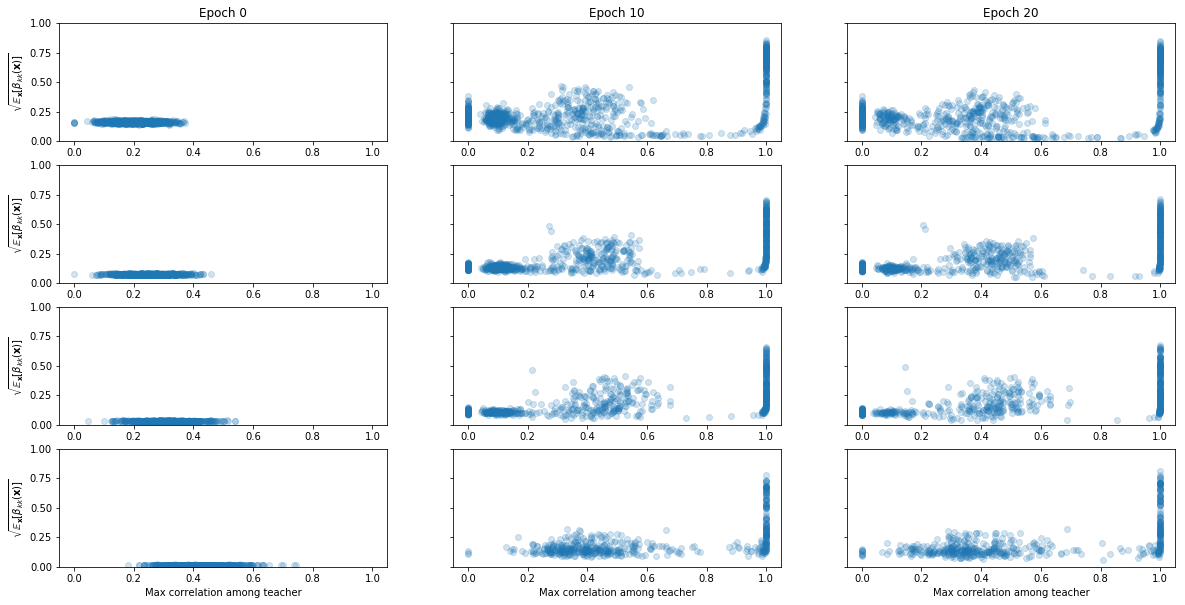

In [20]:
plot_max_corr_alpha(stats, teacher_thres=0.2, student_thres=0.6)

In [455]:
s = stats[0][-1]
for i, corr in enumerate(s["train_corrs"]):
    n, m = corr.size()
    # for every teacher i, how many students are converged to it
    counts = [ (corr[:, i] > 0.9).sum().item() for i in range(m) ]
    cover_ratio = np.sum(np.array(counts) > 0) / m
    
    print(f"L{i}: cover_ratio: {cover_ratio}")

L0: cover_ratio: 1.0
L1: cover_ratio: 1.0
L2: cover_ratio: 1.0
L3: cover_ratio: 1.0


(array([3., 2., 1., 3., 1., 1., 0., 2., 0., 2., 3., 4., 2., 2., 0., 1., 2.,
        2., 1., 2., 0., 1., 5., 1., 3., 0., 1., 0., 2., 3.]),
 array([0.00520833, 0.03802083, 0.07083333, 0.10364583, 0.13645833,
        0.16927083, 0.20208333, 0.23489583, 0.26770833, 0.30052083,
        0.33333333, 0.36614583, 0.39895833, 0.43177082, 0.46458332,
        0.49739582, 0.53020832, 0.56302082, 0.59583332, 0.62864582,
        0.66145832, 0.69427082, 0.72708332, 0.75989582, 0.79270832,
        0.82552082, 0.85833332, 0.89114582, 0.92395831, 0.95677081,
        0.98958331]),
 <a list of 30 Patch objects>)

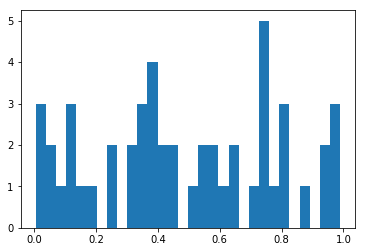

In [107]:
h_stats = (stats[0][24]["eval_teacher_h"][-1] > 1e-5).float().mean(dim=0)

plt.hist(h_stats.numpy(), 30)

In [466]:
# Find correspondence between weights. 
def find_corr(w1, w2):
    inner_prod = w1.t() @ w2
    norm1 = w1.norm(dim=0) + 1e-10
    norm2 = w2.norm(dim=0) + 1e-10
    return inner_prod / norm1[:,None] / norm2[None,:]


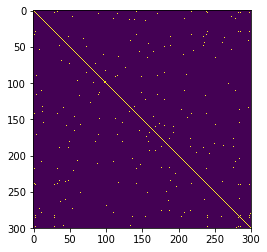

In [195]:
plt.imshow(corrs > 0.95)

In [467]:
s = stats[0][-1]
layer = 3
train_corrs = s["train_corrs"][layer]
alphas = s["train_betas_s"][layer][:-1,:-1]

student_h = s["train_student_h"][layer]
corrs = find_corr(student_h, student_h)

student_act_freq = (s["train_student_h"][layer] > 1e-5).float().mean(dim=0)
student_filter = (student_act_freq - 0.5).abs() < 0.1

#alphas = alphas[student_filter,:]
#train_corrs = train_corrs[student_filter, :]

# find one with high alpha but small correlation. 
student_fanout_coeffs = alphas.norm(dim=1)
student_usefulness = train_corrs.max(dim=1)[0]

sorted_values, sorted_indices = (student_fanout_coeffs - student_usefulness + student_filter.float() * 1000).sort(descending=True)
for idx in sorted_indices[:10]:
    print(f"idx: {idx}")
    print(f"student_act_freq: {student_act_freq[idx]}")
    print(f"fanout_coeff: {student_fanout_coeffs[idx]}")
    print(f"usefulness: {student_usefulness[idx]}")


idx: 236
student_act_freq: 0.5
fanout_coeff: 0.6674302220344543
usefulness: 0.31890636682510376
idx: 1020
student_act_freq: 0.4739583432674408
fanout_coeff: 0.7001849412918091
usefulness: 0.36983340978622437
idx: 1003
student_act_freq: 0.578125
fanout_coeff: 0.5801736116409302
usefulness: 0.2574431300163269
idx: 806
student_act_freq: 0.5208333134651184
fanout_coeff: 0.6499879956245422
usefulness: 0.33051830530166626
idx: 575
student_act_freq: 0.5052083134651184
fanout_coeff: 0.6225380301475525
usefulness: 0.303666353225708
idx: 1015
student_act_freq: 0.546875
fanout_coeff: 0.6326521635055542
usefulness: 0.31893324851989746
idx: 733
student_act_freq: 0.4791666567325592
fanout_coeff: 0.686157763004303
usefulness: 0.38496485352516174
idx: 662
student_act_freq: 0.5052083134651184
fanout_coeff: 0.6620784997940063
usefulness: 0.36415672302246094
idx: 417
student_act_freq: 0.5416666865348816
fanout_coeff: 0.6082019805908203
usefulness: 0.313424289226532
idx: 785
student_act_freq: 0.5
fanout_c

In [469]:
idx = 1020
print(f"{idx}")
print(f"student_act_freq: {student_act_freq[idx]}")
print(f"fanout_coeff: {student_fanout_coeffs[idx]}")
print(f"usefulness: {student_usefulness[idx]}")

sorted_corrs, indices = corrs[idx, :].sort(descending=True)

first_k = 10
print(sorted_corrs[:first_k])
print(indices[:first_k])

for i in range(first_k):
    print(f"First {i+1}: {alphas[indices[:(i+1)], :].sum(dim=0).norm()}, ({sorted_corrs[i]})")

1020
student_act_freq: 0.4739583432674408
fanout_coeff: 0.7001849412918091
usefulness: 0.36983340978622437
tensor([1.0000, 0.6605, 0.5910, 0.5669, 0.5652, 0.5632, 0.5599, 0.5505, 0.5487,
        0.5434])
tensor([1020,  853,  761,  269,  333,   52,  114, 1158,  508,  245])
First 1: 0.7001849412918091, (1.000000238418579)
First 2: 0.6555525660514832, (0.6605211496353149)
First 3: 0.7060345411300659, (0.5909885168075562)
First 4: 0.8372951745986938, (0.5668982267379761)
First 5: 1.0134289264678955, (0.565232515335083)
First 6: 1.011906623840332, (0.5631623864173889)
First 7: 1.0243643522262573, (0.5598565340042114)
First 8: 0.99544757604599, (0.5505287647247314)
First 9: 1.1892393827438354, (0.5487450957298279)
First 10: 1.483761191368103, (0.5434412956237793)


In [464]:
corrs[idx,:]

tensor([0.2837, 0.3298, 0.2446,  ..., 0.5114, 0.3434, 0.1784])

In [465]:
sorted_corrs

tensor([nan, nan, nan,  ..., 0., 0., 0.])

In [4]:
sys.path.append("/private/home/yuandong/luckmatters/catalyst/visualization")
from visualize_multi import plot_multilayer_l_shape

3: student/teacher: torch.Size([1250, 125])
2: student/teacher: torch.Size([1000, 100])
1: student/teacher: torch.Size([750, 75])
0: student/teacher: torch.Size([500, 50])


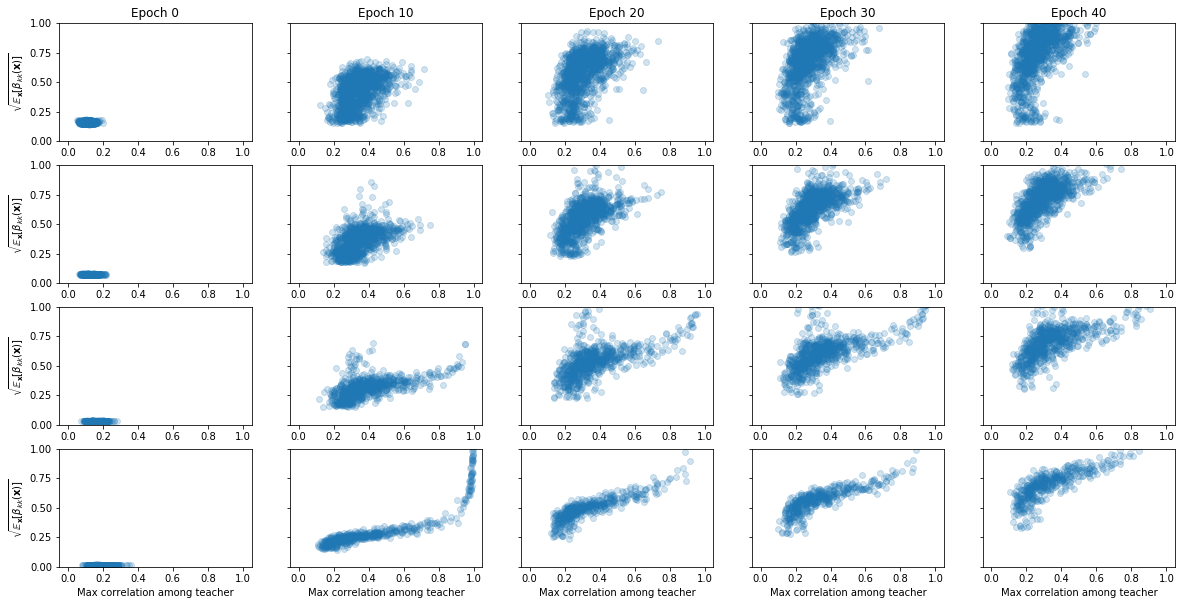

In [6]:
plot_multilayer_l_shape(stats, save_file="multi_layer-no-bn-40.pdf", epoch_till=40)

3: student/teacher: torch.Size([1250, 125])
2: student/teacher: torch.Size([1000, 100])
1: student/teacher: torch.Size([750, 75])
0: student/teacher: torch.Size([500, 50])


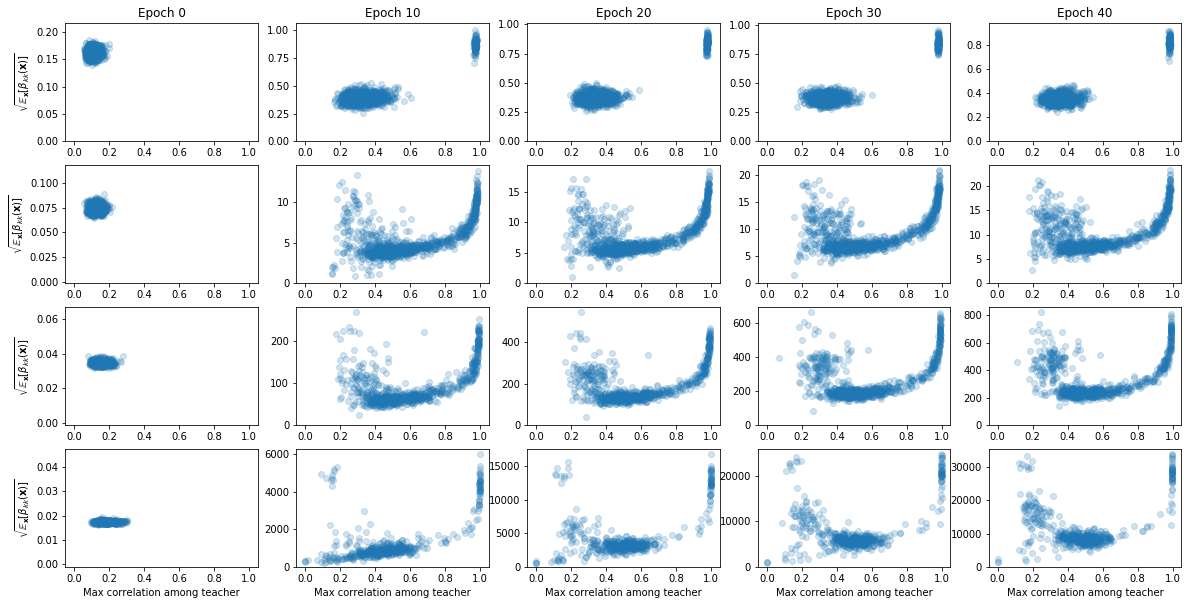

In [11]:
plot_multilayer_l_shape(stats, save_file=f"multi_layer-{suffix}.pdf", epoch_till=40, beta_range=None)